In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Nazwa pliku Excel
filename = 'supplierSelection.xlsx'

# Zakresy danych
sheet_name = 'InputData'
decision_making_matrix_range = 'C4:J17'
criteria_sign_range = 'C18:J18'
lambda_weight_range = 'C19:J19'

# Wczytanie danych z odpowiednich zakresów
decision_making_matrix = pd.read_excel(filename, sheet_name=sheet_name, usecols="C:J", skiprows=3, nrows=14, engine='openpyxl').to_numpy()
criteria_sign = pd.read_excel(filename, sheet_name=sheet_name, usecols="C:J", skiprows=17, nrows=1, engine='openpyxl').to_numpy()
lambda_weight = pd.read_excel(filename, sheet_name=sheet_name, usecols="C:J", skiprows=18, nrows=1, engine='openpyxl').to_numpy()

# Wyświetlenie wczytanych danych
print("Macierz decyzyjna:\n", decision_making_matrix)
print("Znaki kryteriów:\n", criteria_sign)
print("Wagi lambda:\n", lambda_weight)

Macierz decyzyjna:
 [[     3      1  42000      5   4500      6     12      1]
 [     5      7  65000      7   4200      4     12     10]
 [     7      5  66000      9   7000     10     18      5]
 [     3      3  42000      4   4200     15     12      1]
 [     3      3  46000      5   3100      3     18      4]
 [     3      5  40000      3   2500      7     24      8]
 [     5      3  52000      7  29000      8     24      1]
 [     7      9  78000      7   3800      7     24      4]
 [     9      9  95000      5   7500      8     24     10]
 [     1      3  32000      5   2780      5     18      2]
 [     1      3  31000      3   2950      5     12      5]
 [     3      1  40000      7   3000      7     12      7]
 [     9      5 100000      9   6200      4     12      9]
 [     1      1     -1      1     -1      1      1     -1]]
Znaki kryteriów:
 [[1 1 1 1 1 1 1 1]]
Wagi lambda:
 [[nan nan nan nan nan nan nan nan]]


In [7]:
# Przykładowe dane wejściowe
daneA = np.array([
    [1, 0, 55, 60, 70],  # ID, placeholder kolumny, Kryteria 1-3
    [2, 0, 65, 75, 80],
    [3, 0, 50, 65, 60],
    [4, 0, 70, 85, 90],
    [5, 0, 60, 55, 65]
])

daneK = np.array([
    [50, 55, 60],  # Minimalne wartości kryteriów
    [70, 85, 90]   # Maksymalne wartości kryteriów
])


Macierz decyzyjna:
 [[55 60 70]
 [65 75 80]
 [50 65 60]
 [70 85 90]
 [60 55 65]]
Wektor wag:
 [0.6 0.2 0.2]
Macierz skalowana:
 [[0.24427696 0.07794838 0.08484848]
 [0.28869095 0.09743547 0.0969697 ]
 [0.22206996 0.08444407 0.07272727]
 [0.31089795 0.11042687 0.10909091]
 [0.26648396 0.07145268 0.07878788]]
Wektor idealny:
 [0.31089795 0.07145268 0.07272727]
Wektor antyidealny:
 [0.22206996 0.11042687 0.10909091]
Odległości:
 [[0.06802554 0.04621361]
 [0.04190407 0.06894967]
 [0.08977298 0.0446925 ]
 [0.05330386 0.08882799]
 [0.04482559 0.0664068 ]]
Ranking:
 [[1.         0.40453393]
 [2.         0.62198773]
 [3.         0.33237156]
 [4.         0.62496892]
 [5.         0.59700957]]


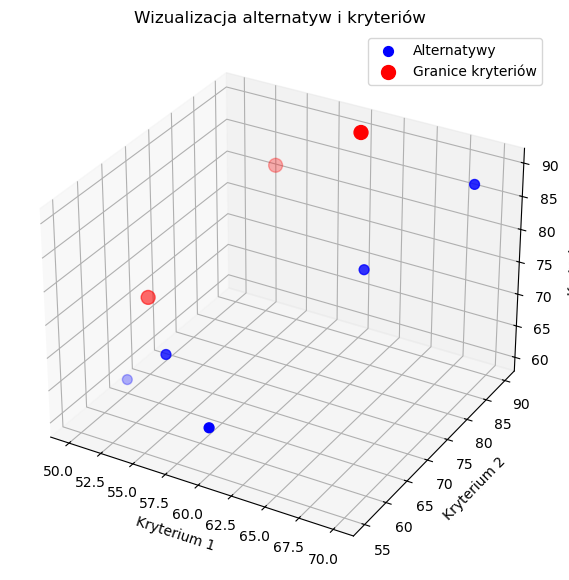

Ranking wynikowy:
 [[1.         0.40453393]
 [2.         0.62198773]
 [3.         0.33237156]
 [4.         0.62496892]
 [5.         0.59700957]]


In [8]:
# Funkcja TOPSIS
def licz_topsis(daneA, daneK):
    # Określenie wielkości problemu
    liczba_alternatyw, ilosc_kolumn = daneA.shape
    ilosc_kryteriow = ilosc_kolumn - 2  # Omiń ID i placeholder

    liczba_klas, ilosc_kryteriow_k = daneK.shape

    # Sprawdzenie punktów alternatyw
    alternatywy_ok = np.zeros(liczba_alternatyw, dtype=int)
    for i in range(liczba_alternatyw):
        alternatywy_ok[i] = all(
            daneK[0, j] <= daneA[i, j + 2] <= daneK[1, j]
            for j in range(ilosc_kryteriow)
        )

    # Filtracja alternatyw
    alternatywy_filtrowane = daneA[alternatywy_ok == 1]
    liczba_alternatyw_temp = alternatywy_filtrowane.shape[0]

    # Uzupełnienie macierzy decyzyjnej
    macierz_decyzyjna = alternatywy_filtrowane[:, 2:]

    # Przykładowy wektor wag
    wektor_wag = np.array([0.6, 0.2, 0.2])

    # Proces skalowania
    macierz_skalowana = np.zeros_like(macierz_decyzyjna, dtype=float)
    for j in range(ilosc_kryteriow):
        macierz_skalowana[:, j] = (
            macierz_decyzyjna[:, j] * wektor_wag[j] /
            np.sqrt(np.sum(macierz_decyzyjna[:, j] ** 2))
        )

    # Wyznaczenie wektora idealnego i antyidealnego
    wektor_idealny = np.array([
        np.max(macierz_skalowana[:, 0]),
        np.min(macierz_skalowana[:, 1]),
        np.min(macierz_skalowana[:, 2])
    ])
    wektor_anty_idealny = np.array([
        np.min(macierz_skalowana[:, 0]),
        np.max(macierz_skalowana[:, 1]),
        np.max(macierz_skalowana[:, 2])
    ])

    # Wyznaczenie odległości w przestrzeni euklidesowej
    odleglosci = np.zeros((liczba_alternatyw_temp, 2))
    for i in range(liczba_alternatyw_temp):
        suma_idealny = np.sum((macierz_skalowana[i] - wektor_idealny) ** 2)
        suma_anty_idealny = np.sum((macierz_skalowana[i] - wektor_anty_idealny) ** 2)
        odleglosci[i, 0] = np.sqrt(suma_idealny)
        odleglosci[i, 1] = np.sqrt(suma_anty_idealny)

    # Uszeregowanie obiektów
    ranking = np.zeros((liczba_alternatyw_temp, 2))
    for i in range(liczba_alternatyw_temp):
        ranking[i, 0] = alternatywy_filtrowane[i, 0]  # ID alternatywy
        ranking[i, 1] = odleglosci[i, 1] / (odleglosci[i, 0] + odleglosci[i, 1])

    # Wyświetlenie wyników
    print("Macierz decyzyjna:\n", macierz_decyzyjna)
    print("Wektor wag:\n", wektor_wag)
    print("Macierz skalowana:\n", macierz_skalowana)
    print("Wektor idealny:\n", wektor_idealny)
    print("Wektor antyidealny:\n", wektor_anty_idealny)
    print("Odległości:\n", odleglosci)
    print("Ranking:\n", ranking)

    # Rysowanie wyników
    rysuj_wykres(macierz_decyzyjna, daneK)
    return ranking

# Funkcja do rysowania wyników
def rysuj_wykres(macierz_decyzyjna, daneK):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Rysowanie alternatyw
    ax.scatter(macierz_decyzyjna[:, 0], macierz_decyzyjna[:, 1], macierz_decyzyjna[:, 2], 
               color='blue', label='Alternatywy', s=50)

    # Rysowanie granic kryteriów
    ax.scatter(daneK[0, :], daneK[1, :], daneK[1, :], 
               color='red', label='Granice kryteriów', s=100, marker='o')

    # Ustawienia wykresu
    ax.set_xlabel("Kryterium 1")
    ax.set_ylabel("Kryterium 2")
    ax.set_zlabel("Kryterium 3")
    ax.legend()
    plt.title("Wizualizacja alternatyw i kryteriów")
    plt.show()

# Wywołanie funkcji
ranking = licz_topsis(daneA, daneK)
print("Ranking wynikowy:\n", ranking)

In [13]:
import numpy as np

# Sprawdzenie brakujących wag i uzupełnienie równomiernymi
if np.isnan(lambda_weight).all():
    lambda_weight = np.ones(decision_making_matrix.shape[1]) / decision_making_matrix.shape[1]

# Przygotowanie danych dla kryteriów
criteria_types = np.array([1 if sign == 1 else -1 for sign in criteria_sign[0]])

# Przygotowanie danych do funkcji TOPSIS
daneA = decision_making_matrix
daneK_min = np.min(decision_making_matrix, axis=0)  # Minimalne wartości dla każdego kryterium
daneK_max = np.max(decision_making_matrix, axis=0)  # Maksymalne wartości dla każdego kryterium
daneK = np.vstack([daneK_min, daneK_max])

# Uwaga: Funkcja licz_topsis w Pythonie oczekuje macierzy `daneA` oraz `daneK`
ranking = licz_topsis(daneA, daneK)

# Wyświetlenie wyników
print("Ranking alternatyw:\n", ranking)

IndexError: index 3 is out of bounds for axis 0 with size 3